## Configuration

In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np

# Path to the image directory
image_dir = "food-101/images"

# List of classes (folders inside images/)
classes = os.listdir(image_dir)

# Select specific classes (here we are taking the first 10 classes)
classes_to_use = classes[:10]  

2025-02-25 07:57:08.768097: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-25 07:57:08.768204: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-25 07:57:08.768256: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-25 07:57:10.219411: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Image visualisation

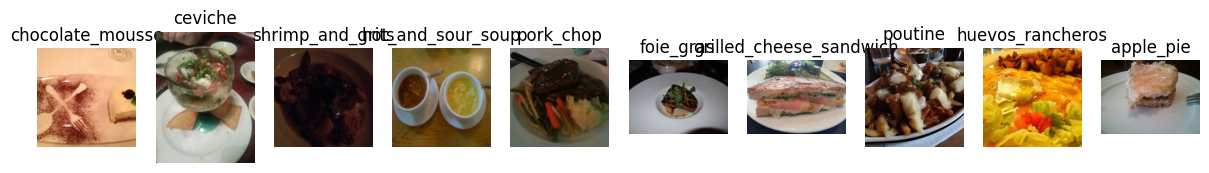

In [2]:
# Display images from the selected classes
random_images = []
for class_name in classes_to_use:
    class_path = os.path.join(image_dir, class_name)
    image_name = random.choice(os.listdir(class_path))  # Choose a random image from the class
    image_path = os.path.join(class_path, image_name)
    random_images.append((image_path, class_name))  # Store the path and class name

# Show images
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for ax, (img_path, label) in zip(axes, random_images):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")

plt.show()


## Data Augmentation & Data Generators

In [3]:
# Parameters
img_size = (128, 128)  # Image size
batch_size = 32  # Number of images per batch
train_dir = "food-101/images"  # Directory containing images

# Image generator for training (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization (0-1)
    validation_split=0.2,  # 20% of images for validation
    horizontal_flip=True,
    rotation_range=20
)

# Load images only from the selected classes
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    classes=classes_to_use  # Load only the selected classes
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    classes=classes_to_use  # Load only the selected classes
)


Found 8000 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.


## Model Definition

In [4]:
# Define the model
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2,2),

    # Block 2
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    # Block 3
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    # Fully Connected Layer
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(len(classes_to_use), activation="softmax")  # Number of classes
])

## Compilation

In [5]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

## Training

In [6]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    verbose=1,
    epochs=30
)


Epoch 1/30
250/250 [==============================] - 1170s 5s/step - loss: 2.2471 - accuracy: 0.1577 - val_loss: 2.1490 - val_accuracy: 0.2045
Epoch 2/30
250/250 [==============================] - 438s 2s/step - loss: 2.1472 - accuracy: 0.2128 - val_loss: 2.1435 - val_accuracy: 0.2230
Epoch 3/30
250/250 [==============================] - 96s 382ms/step - loss: 2.0936 - accuracy: 0.2345 - val_loss: 2.0098 - val_accuracy: 0.2900
Epoch 4/30
250/250 [==============================] - 95s 380ms/step - loss: 2.0425 - accuracy: 0.2618 - val_loss: 2.0265 - val_accuracy: 0.2820
Epoch 5/30
250/250 [==============================] - 95s 378ms/step - loss: 1.9521 - accuracy: 0.2968 - val_loss: 1.8623 - val_accuracy: 0.3565
Epoch 6/30
250/250 [==============================] - 98s 390ms/step - loss: 1.8861 - accuracy: 0.3281 - val_loss: 1.8259 - val_accuracy: 0.3520
Epoch 7/30
250/250 [==============================] - 95s 377ms/step - loss: 1.8060 - accuracy: 0.3591 - val_loss: 1.7222 - val_accur

## Evaluation

In [ ]:
# Evaluate on the validation set
loss, accuracy = model.evaluate(val_generator)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


63/63 [==============================] - 16s 248ms/step - loss: 1.4476 - accuracy: 0.5190
Loss: 1.4476, Accuracy: 0.5190


## Plotting

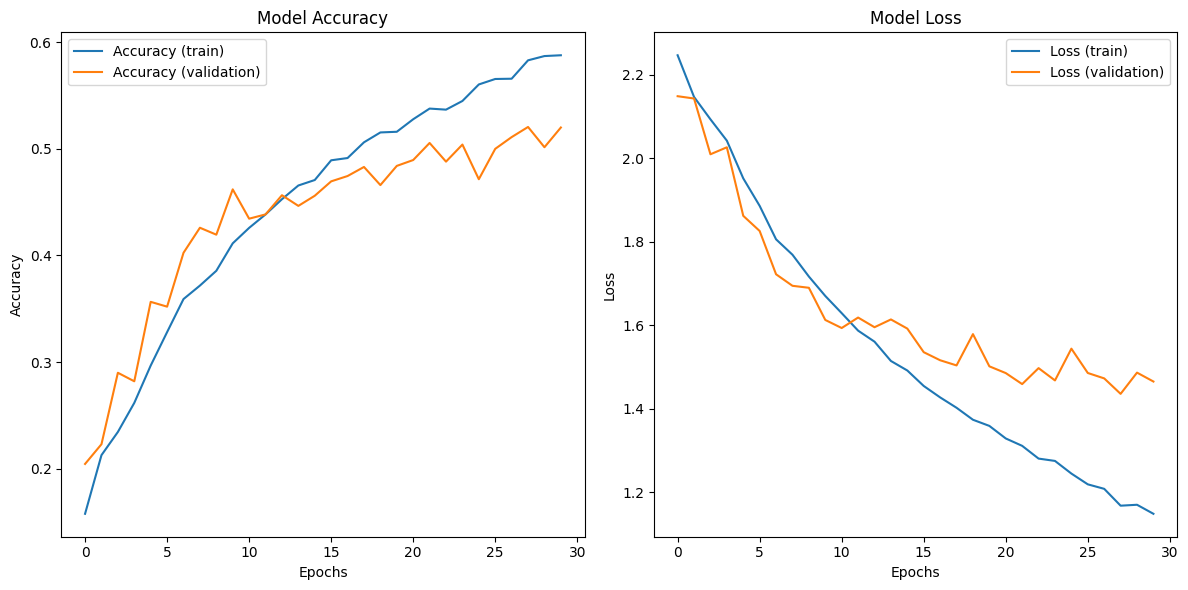

In [8]:
import matplotlib.pyplot as plt

# Retrieve accuracy and loss data from the history object
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(acc, label='Accuracy (train)')
plt.plot(val_acc, label='Accuracy (validation)')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss (train)')
plt.plot(val_loss, label='Loss (validation)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the graphs
plt.tight_layout()
plt.show()


## Classification Report & Confusion matrix

63/63 [==============================] - 16s 251ms/step
Classification Report:
                         precision    recall  f1-score   support

       chocolate_mousse     0.1158    0.1100    0.1128       200
                ceviche     0.1308    0.1400    0.1353       200
       shrimp_and_grits     0.1123    0.1050    0.1085       200
      hot_and_sour_soup     0.1462    0.1250    0.1348       200
              pork_chop     0.1321    0.1400    0.1359       200
              foie_gras     0.1099    0.1000    0.1047       200
grilled_cheese_sandwich     0.0948    0.1100    0.1019       200
                poutine     0.0896    0.0950    0.0922       200
       huevos_rancheros     0.0802    0.0850    0.0825       200
              apple_pie     0.0745    0.0700    0.0722       200

               accuracy                         0.1080      2000
              macro avg     0.1086    0.1080    0.1081      2000
           weighted avg     0.1086    0.1080    0.1081      2000


Confusi

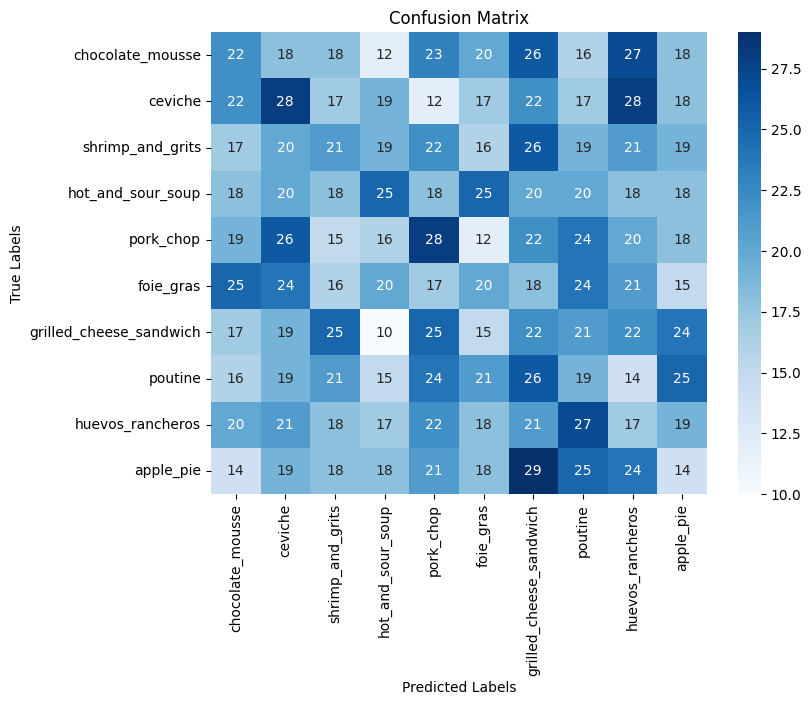

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# Get true labels (in categorical format)
y_true = val_generator.classes

# Generate classification report
class_names = list(val_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(
    y_true,
    y_pred_classes,
    target_names=class_names,
    digits=4
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# V2 - More Complex model and more epochs

In [15]:
# Define the model
model = models.Sequential([
    # Block 1
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(128, 128, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    # Second convolutional block
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.4),

    # Third convolutional block
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.4),

    # Fourth convolutional block
    layers.Conv2D(256, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.5),

    # Classifier head
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.6),
        
    layers.Dense(len(classes_to_use), activation='softmax')
])    

In [16]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Display model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_15 (Ba  (None, 126, 126, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 63, 63, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_16 (Ba  (None, 61, 61, 64)       

In [17]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    verbose=1,
    epochs=50
)

Epoch 1/50
250/250 [==============================] - 121s 469ms/step - loss: 2.9760 - accuracy: 0.1685 - val_loss: 8.2865 - val_accuracy: 0.1000
Epoch 2/50
250/250 [==============================] - 118s 473ms/step - loss: 2.4251 - accuracy: 0.2319 - val_loss: 6.3485 - val_accuracy: 0.1090
Epoch 3/50
250/250 [==============================] - 113s 451ms/step - loss: 2.1398 - accuracy: 0.2862 - val_loss: 2.4685 - val_accuracy: 0.2530
Epoch 4/50
250/250 [==============================] - 119s 476ms/step - loss: 1.9523 - accuracy: 0.3271 - val_loss: 3.1277 - val_accuracy: 0.1820
Epoch 5/50
250/250 [==============================] - 118s 471ms/step - loss: 1.8287 - accuracy: 0.3614 - val_loss: 2.3583 - val_accuracy: 0.2485
Epoch 6/50
250/250 [==============================] - 116s 465ms/step - loss: 1.7423 - accuracy: 0.3951 - val_loss: 1.8688 - val_accuracy: 0.3595
Epoch 7/50
250/250 [==============================] - 119s 476ms/step - loss: 1.6535 - accuracy: 0.4254 - val_loss: 1.8473 -

In [18]:
# Evaluate on the validation set
loss, accuracy = model.evaluate(val_generator)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")


63/63 [==============================] - 16s 252ms/step - loss: 1.3861 - accuracy: 0.5795
Loss: 1.3861, Accuracy: 0.5795


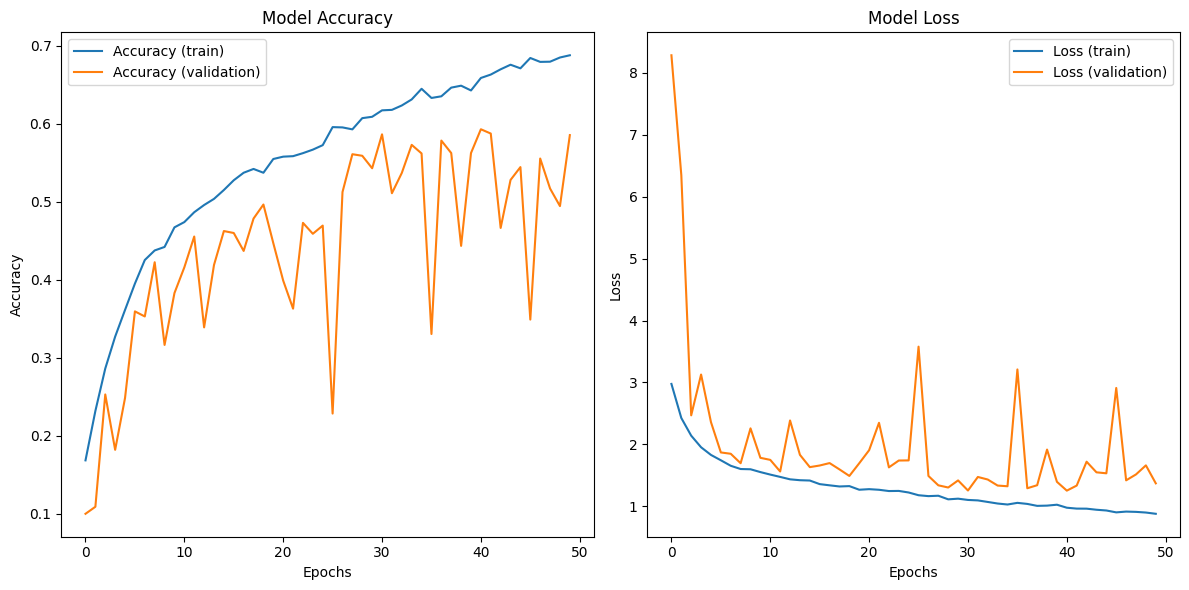

In [19]:
import matplotlib.pyplot as plt

# Retrieve accuracy and loss data from the history object
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))

# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(acc, label='Accuracy (train)')
plt.plot(val_acc, label='Accuracy (validation)')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss (train)')
plt.plot(val_loss, label='Loss (validation)')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the graphs
plt.tight_layout()
plt.show()


63/63 [==============================] - 16s 242ms/step
Classification Report:
                         precision    recall  f1-score   support

       chocolate_mousse     0.0811    0.0600    0.0690       200
                ceviche     0.0541    0.0200    0.0292       200
       shrimp_and_grits     0.1124    0.1000    0.1058       200
      hot_and_sour_soup     0.0737    0.0800    0.0767       200
              pork_chop     0.1111    0.1150    0.1130       200
              foie_gras     0.0957    0.0550    0.0698       200
grilled_cheese_sandwich     0.1134    0.1900    0.1421       200
                poutine     0.1073    0.0950    0.1008       200
       huevos_rancheros     0.0968    0.1050    0.1007       200
              apple_pie     0.1084    0.1800    0.1353       200

               accuracy                         0.1000      2000
              macro avg     0.0954    0.1000    0.0942      2000
           weighted avg     0.0954    0.1000    0.0942      2000


Confusi

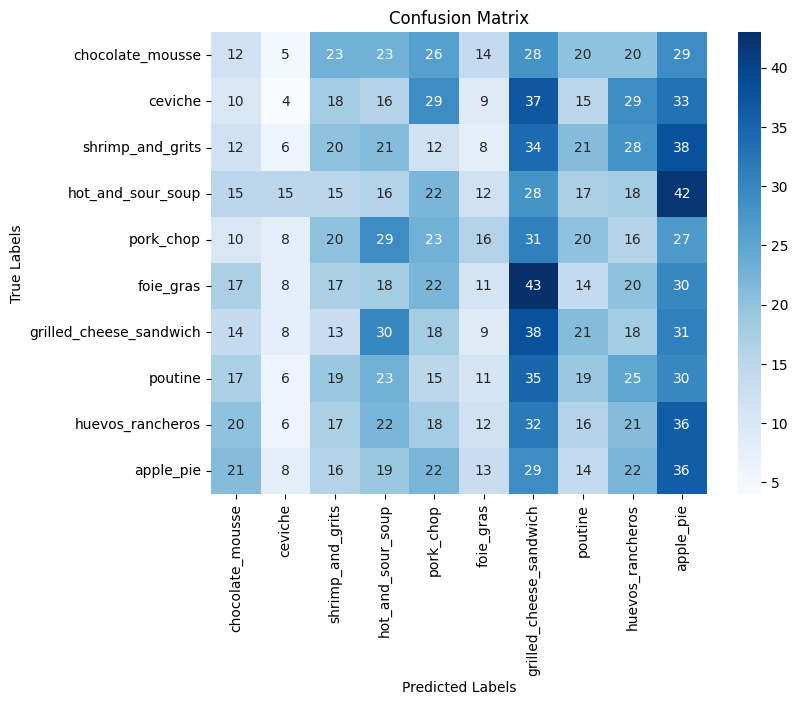

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# Get true labels (in categorical format)
y_true = val_generator.classes

# Generate classification report
class_names = list(val_generator.class_indices.keys())
print("Classification Report:")
print(classification_report(
    y_true,
    y_pred_classes,
    target_names=class_names,
    digits=4
))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("\nConfusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()